# Experimental Procedure 

Begin by using your computer software to create 100 samples each of size 20 from the C+E model $Y =\mu + \epsilon$, with $\epsilon \sim N(0,\sigma^{2})$, for your choice of $\mu$ and $\sigma^{2}$. For each sample, calculate a level 0.95 confidence interval for $\mu$.

 - Count the number of intervals that do not contain μ. How does this number compare with what you expect from the confidence level 0.95?
 - Record the mean width of the intervals.

## The Confidence Intervals for the Means
*Note*: The formula for a *$100(1 - \alpha)$* confidence interval estimate of the mean is as follows:

$(\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \ \ \bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}})$

Where *$\bar{x}$* denotes the observed value of the sample mean.

In [445]:
n = 20 # sample size
n_samples = 100

mu = 5
sigma = 10
alpha = .05
std = sigma / sqrt(n)

construct_cis = function (n_samples) {
    mx = matrix(rnorm(n_samples * n, mean=mu, sd=sigma), ncol=n)
    cis_l = cis_u = rep(NA, n_samples)
    x_bars = rep(NA, n_samples)

    for (i in 1:n_samples) {
        x_bar = mean(mx[i,])
        x_bars[i] = x_bar

        z_a2 = qnorm(alpha/2, 0, 1, lower.tail=F)
        cis_l[i] = x_bar - z_a2 * std
        cis_u[i] = x_bar + z_a2 * std
    }
    
    return(data.frame(x_bars=x_bars, cis_l=cis_l, cis_u=cis_u))
}

output = construct_cis(n_samples)

In [430]:
head(output)

x_bars,cis_l,cis_u,n,mu,sigma
4.351076,-0.03153632,8.733689,20,5,10
-1.641187,-6.02379931,2.741426,20,5,10
5.242972,0.86035910,9.625585,20,5,10
4.669691,0.28707860,9.052304,20,5,10
5.116405,0.73379206,9.499017,20,5,10
7.530421,3.14780819,11.913034,20,5,10


## CI Plot 

no. of intervels do not contain mu 7 
% inteverals contain mu 0.93 


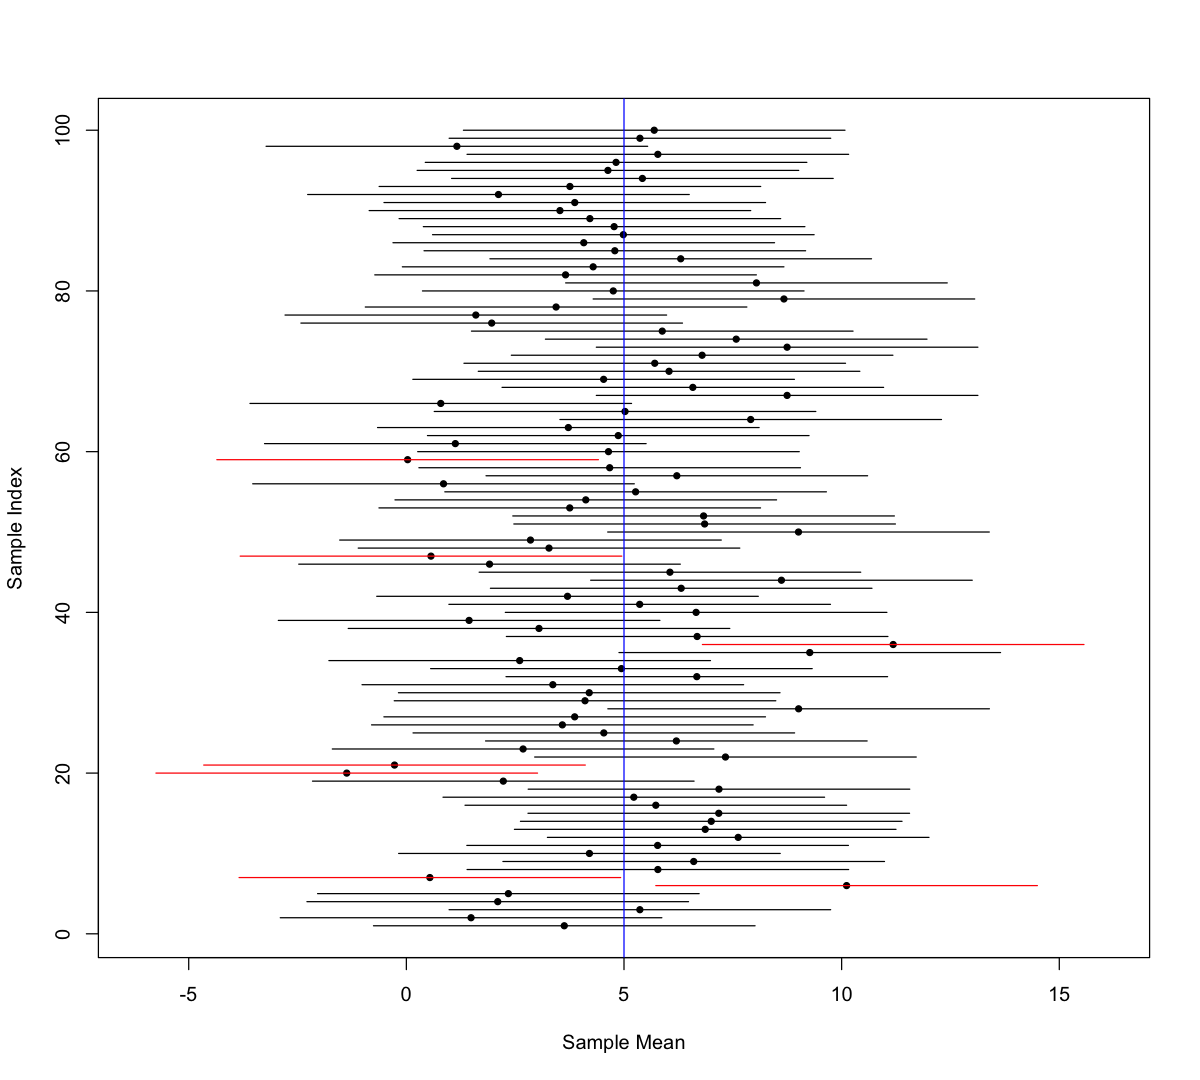

In [448]:
library(dplyr)

plot_intervals = function(output) {
    # number of intervals do not contain mu
    count = 0
    x_bars = output$x_bars
    cis_l = output$cis_l
    cis_u = output$cis_u

    n_samples = length(x_bars)
    
    plot(x_bars, 1:n_samples, pch=20, xlim=c(mu - 5*std, mu + 5*std), xlab='Sample Mean', ylab='Sample Index')

    for (i in 1:length(cis_l)) {
        col = 'black'
        if ( ! between(mu, cis_l[i], cis_u[i]) ) {
            count = count+1
            col = 'red'
        }

        segments(cis_l[i], i, cis_u[i], i, col=col)
    }

    abline(v=mu, col='blue')
    cat('no. of intervels do not contain mu', count, "\n")
    cat('% inteverals contain mu', (n_samples - count)/n_samples, "\n")
}

plot_intervals(output)

no. of intervels do not contain mu 24 
% inteverals contain mu 0.952 


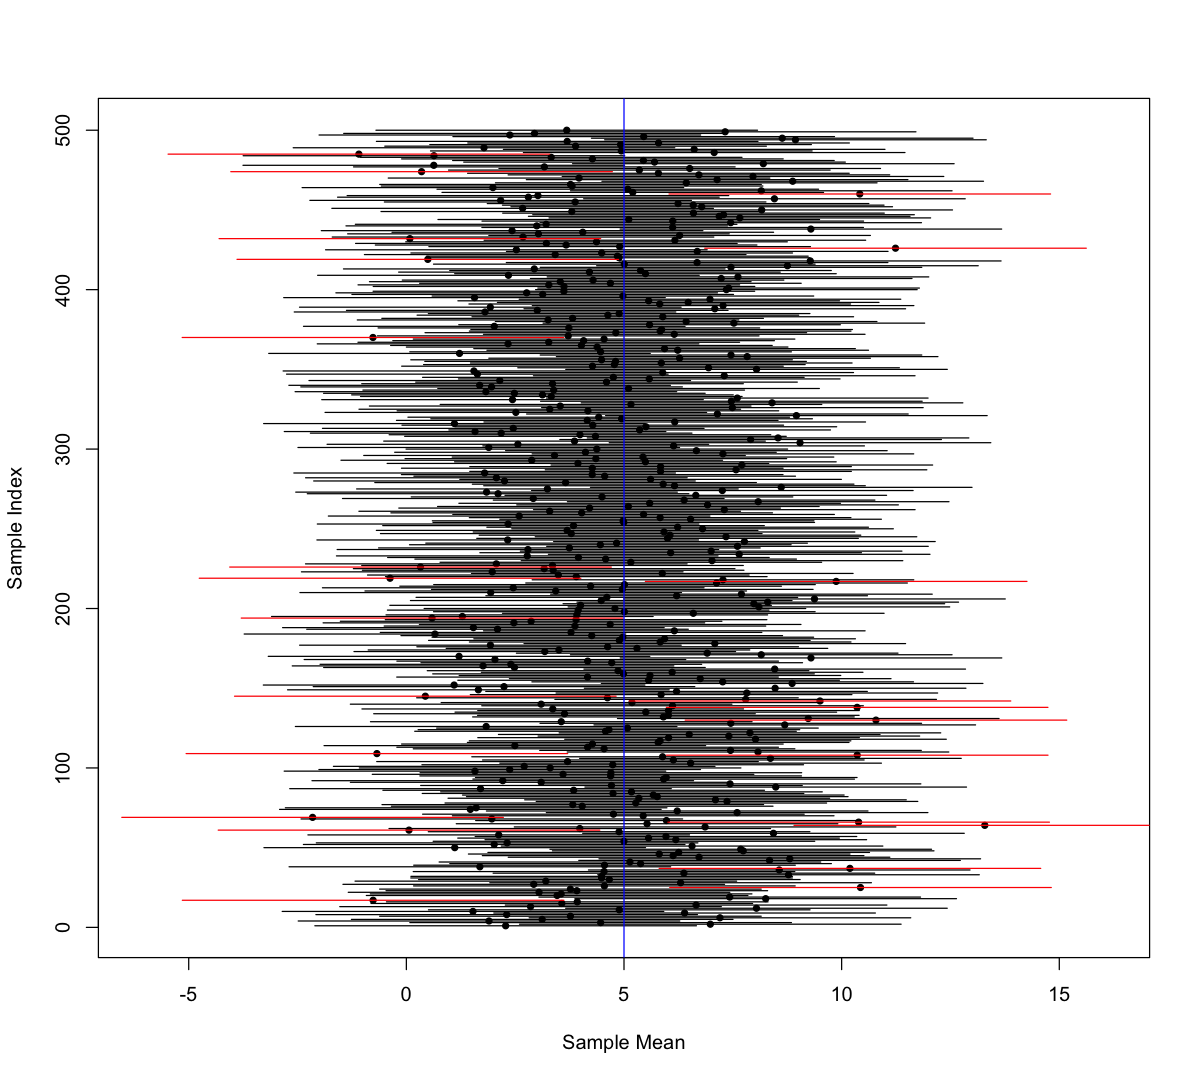

In [447]:
n_samples = 500

plot_intervals(construct_cis(n_samples))

## Contaminated Distributions

- Model, Data: C+E model, $Y \sim \mu + c\epsilon_{1} + (1-c)\epsilon_{2}$.

In [449]:
mu = 3
sigma = 5

n_samples = 100
n = 20 # sample size

generate_contaminated_samples = function (n_samples, c) {
    eta = rexp(n_samples, 1/sigma) - 1/sigma
    xi = rnorm(n_samples, 0, sigma)
    b = rbinom(n_samples, 1, c)
    y = rep(NA, n_samples)
    
    for (i in 1:n_samples) {
        if (b[i] == 1) {
            y[i] = mu + eta[i]
        } else {
            y[i] = mu + xi[i]
        }
    }

    return(y)
}

cis_contaminated_dist = function (n_samples, c) {
    mx = matrix(generate_contaminated_samples(n_samples * n, c), ncol=n)
    cis_l = cis_u = rep(NA, n_samples)
    x_bars = rep(NA, n_samples)

    for (i in 1:n_samples) {
        x_bar = mean(mx[i,])
        x_bars[i] = x_bar

        z_a2 = qnorm(alpha/2, 0, 1, lower.tail=F)
        cis_l[i] = x_bar - z_a2 * std
        cis_u[i] = x_bar + z_a2 * std
    }
    
    return(data.frame(x_bars=x_bars, cis_l=cis_l, cis_u=cis_u))
}

no. of intervels do not contain mu 0 
% inteverals contain mu 1 


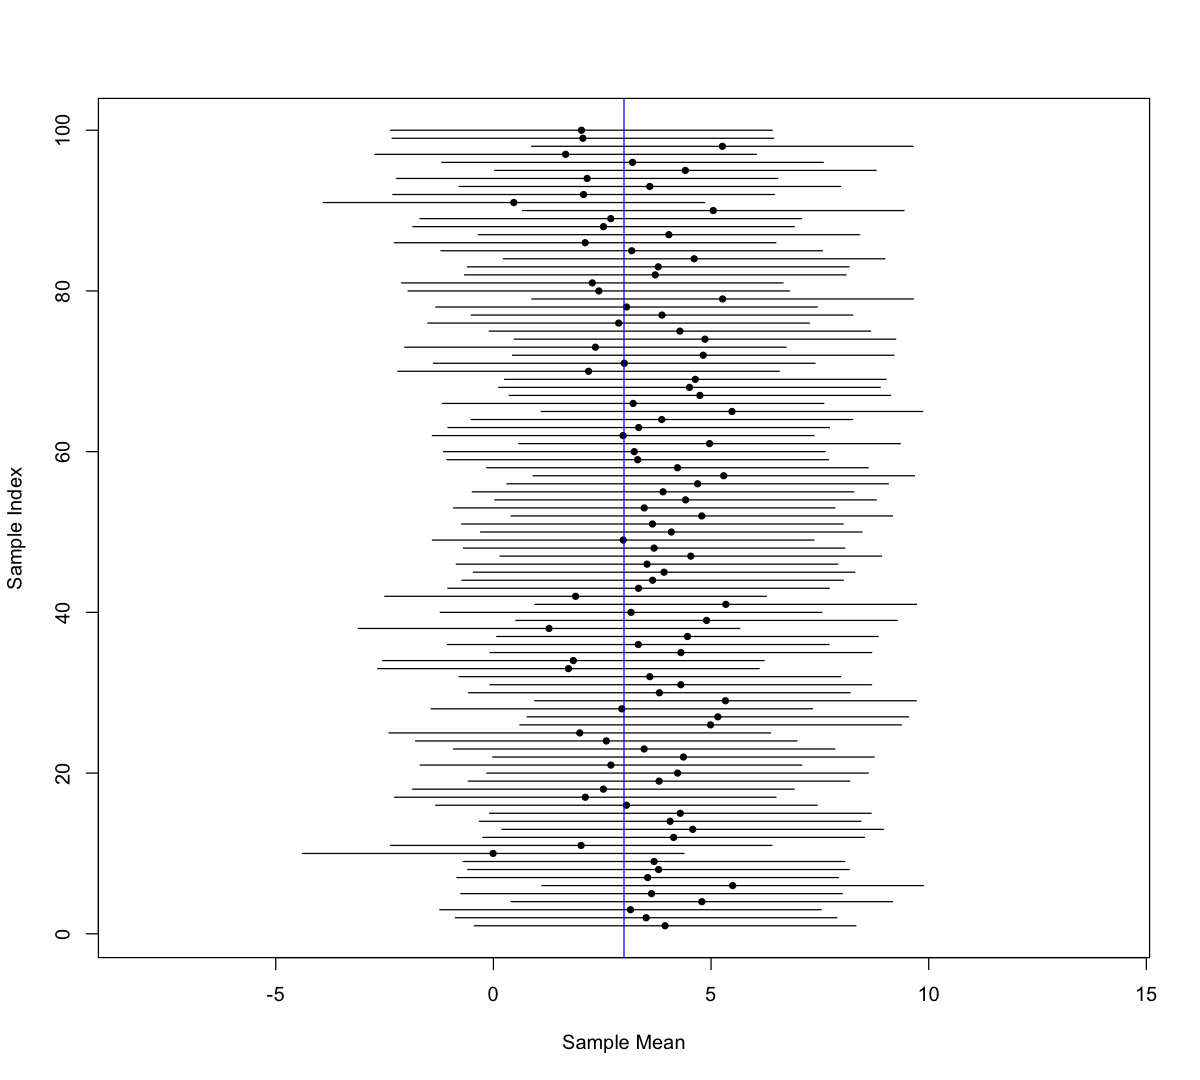

In [451]:
plot_intervals(cis_contaminated_dist(n_samples, 0.1))

no. of intervels do not contain mu 4 
% inteverals contain mu 0.96 


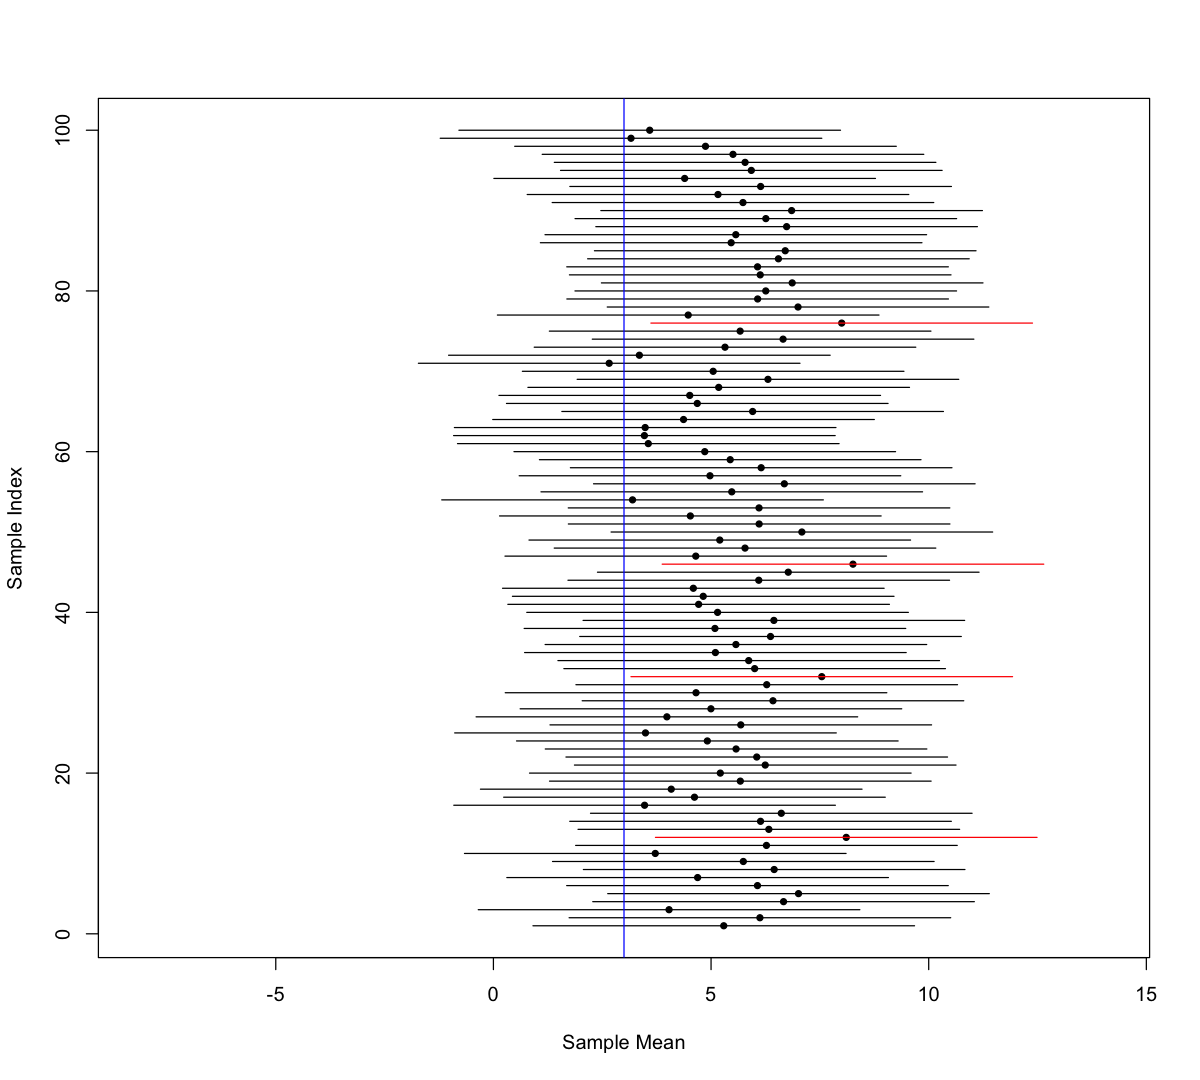

In [452]:
plot_intervals(cis_contaminated_dist(n_samples, .5))